<a href="https://colab.research.google.com/github/Danhil1/Algorythm_Python_2022/blob/master/3%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

In [ ]:
color = sns.color_palette()
%matplotlib inline
train_df = pd.read_csv('/content/all_v2.csv')
train_df.head()    

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661.0,1.0,8.0,10.0,3.0,82.6,10.8,1.0
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81.0,3.0,5.0,24.0,2.0,69.1,12.0,1.0
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871.0,1.0,5.0,9.0,3.0,66.0,10.0,1.0
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843.0,4.0,12.0,16.0,2.0,38.0,5.0,11.0
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81.0,3.0,13.0,14.0,2.0,60.0,10.0,1.0


In [ ]:
for f in train_df.columns:
  if train_df[f].dtype=='object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[f].values))
    train_df[f] = lbl.transform(list(train_df[f].values))


In [ ]:
train_X = train_df.drop(["date", "geo_lat", "geo_lon"], axis=1)
train_Y = train_df["price"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(train_X, train_Y, test_size=0.4)

In [ ]:
Xtrain = Xtrain.fillna(0)
Ytrain = Ytrain.fillna(0)
Xtest = Xtest.fillna(0)
Ytest = Ytest.fillna(0)

In [ ]:
gr=np.arange(1,15,1)
facc=[]
acc=0

In [ ]:
for i in gr:
  scc=0
  model = RandomForestRegressor(n_estimators=i, max_depth = 8)
  model.fit(Xtrain,Ytrain)
  y_predicted = model.predict(Xtest)
  scc=model.score(Xtest,Ytest)
  facc.append(scc)
  if scc > acc:
    acc=scc
    mf=i
print("Random Forest: , n_estimators", i, " Точность", scc)

Random Forest: , n_estimators 14  Точность 0.9998257109526382


best n_estimators 14 Наилучшая точность 0.9998257109526382


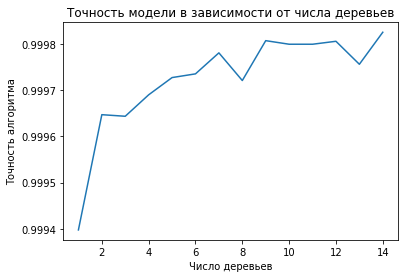

In [ ]:
plt.plot(gr,facc)
plt.title("Точность модели в зависимости от числа деревьев")
plt.xlabel("Число деревьев")
plt.ylabel("Точность алгоритма")
print("best n_estimators", mf, "Наилучшая точность", acc )

In [ ]:
scc=mean_squared_log_error(Ytest, y_predicted)
print("Error RMSLE", scc)
gmd=np.arange(1,16,1)
facc_md=[]
acc=0

ValueError: ignored

In [ ]:
for i in gmd:
  scc=0
  model = RandomForestRegressor(n_estimators=14, max_depth = i)
  model.fit(Xtrain,Ytrain)
  y_predicted = model.predict(Xtest)
  scc=model.score(Xtest,Ytest)
  facc_md.append(scc)
  if scc > acc:
    acc=scc
    mf=i
print("Random Forest: , Max_depth", i, " Точность", scc)

In [ ]:
plt.plot (gmd,facc_md)
plt.title("Точность модели в зависимости от глубины деревьев")
plt.xlabel("Глубина деревьев")
plt.ylabel("Точность алгоритма")